> "The Hidden Markov Model is a finite set of states, each of which is associated with a (generally multidimensional) <font color='red'>probability distribution</font> [].  
Transitions among the states are governed by a set of probabilities called transition probabilities." 

> A hidden markov model <font color='red'>works with probabilities to predict</font> future events or states. 
[TensorFlow 解釋](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel)  
---
#### 這篇文章將做一個 hidden markov model 來預測天氣。

### Data:
**States:**   
- In each markov model we have a finite set of states.   
- 可能是 "warm" and "cold" or "high" and "low"   
- States are <font color='red'>"hidden"</font> within the model，表示我們不直接觀察。

**Observations:** 
- Each state has a particular outcome or observation associated with it based on a <font color='red'>probability distribution   </font> .
- Example: *On a hot day Tim has a 80% chance of being happy and a 20% chance of being sad.*

**Transitions:** 
- Each state will have a probability defining <font color='red'>the likelyhood of transitioning to a different state.</font> 
- Example: *a cold day has a 30% chance of being followed by a hot day and a 70% chance of being follwed by another cold day.*

To create a hidden markov model we need:
- States
- Observation Distribution
- Transition Distribution
---
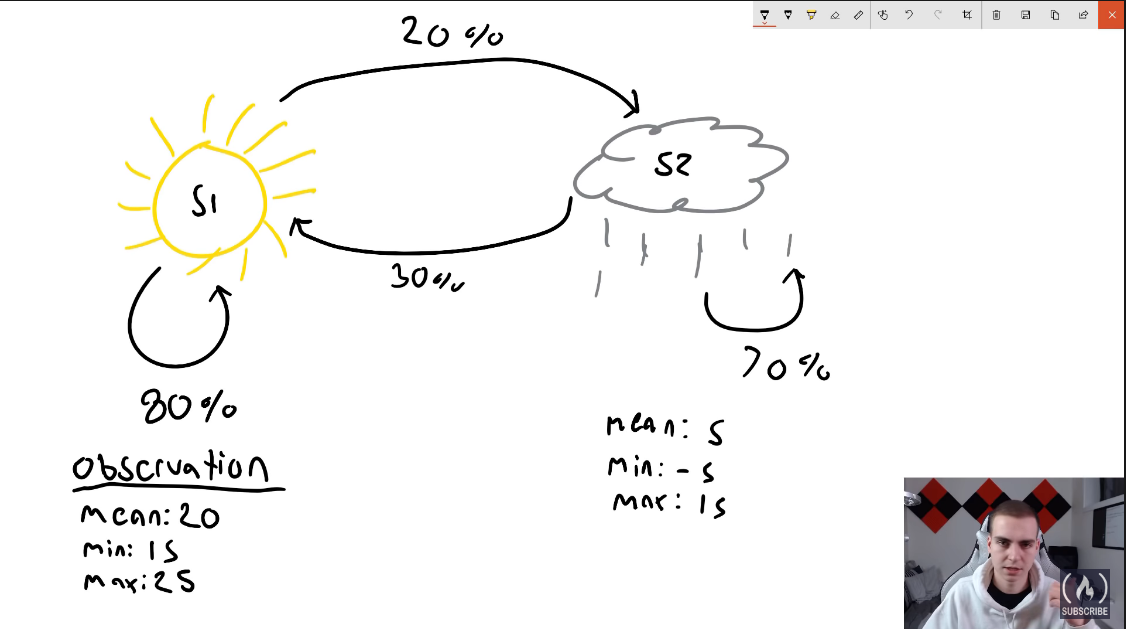

#### 這個情況有:
- 兩個 states: 
    - s1 代表熱天
    - s2 代表冷天。
- 兩個 observations: 
    - 當熱天時，最高溫 25 度，最低溫 15 度，平均是 20 度。
    - 當冷天時，最高溫 15 度，最低溫 -5 度，平均是 5 度。
- 兩個 transitions:
    - 當今天是熱天，明天有 20 % 的機率會變冷天，80 % 的機率仍為熱天。
    - 當今天是冷天，明天有 30 % 的機率會變熱天，70 % 的機率仍為冷天。


#### We will model a simple weather system and try to <font color='red'>predict the temperature on each day</font> given the following information:
1. 冷天代表 0，熱天代表 1.
2. The first day in our sequence has an 80% chance of being cold.
3. 冷天之後，有 30 % 的機率明天是熱天。
4. 熱天之後，有 20 % 的機率明天是冷天。
5. 而每天的氣溫都是 <font color='red'>Normally distributed</font> with:
    - mean and standard deviation 0 and 5 on a cold day
    - mean and standard deviation 15 and 10 on a hot day.

#### 用 <font color='green'>tfd.Categorical() 與 tfd.Normal()</font> 表示機率的分配。  
- <font color='green'>loc</font> 代表平均
- <font color='green'>scale</font> 代表標準差

In [1]:
!pip install tensorflow_probability==0.8.0rc0 --user --upgrade

Requirement already up-to-date: tensorflow_probability==0.8.0rc0 in c:\users\user\appdata\roaming\python\python37\site-packages (0.8.0rc0)


In [2]:
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow as tf

In [6]:
tf.enable_eager_execution()

In [7]:
tfd = tfp.distributions # making a shortcut for later on

initial_distribution = tfd.Categorical(probs=[0.8, 0.2])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above

observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above
# 冷天時平均溫度是 0 ，標準差是 5。
# 冷天時平均溫度是 15 ，標準差是 10。

#### 設置好 distribution 後，就可以創建 model 了!
---
#### 用 <font color='green'> tfd.HiddenMarkovModel(三個 distr, <font color='red'>nums_steps</font>)</font>。
##### num_steps 代表我們要給模型 run 幾次(在這個例子是幾天)

In [8]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7) 

#### 看看電腦學習的成果:
---
#### 新版本的 tensorflow 需使用 <font color='green'>tf.compat.v1.Session() </font>

In [11]:
mean = model.mean()
print(type(mean))
# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

print(mean.numpy())

# 舊版 TensorFlow 的寫法:
# with tf.compat.v1.Session() as sess:  
   # print(mean.numpy())

<class 'tensorflow.python.framework.ops.EagerTensor'>
[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]


#### 注意: 重新 train models 的結果會跟之前一樣，因為條件，機率是相同的。

In [10]:
tf.executing_eagerly()

True

[根據這篇文章的說法，我不在 eager mode，因此 tensor 不支持 .numpy()](https://github.com/tensorflow/tensorflow/issues/27519)

[eager mode 是最新推出的，因此可能作者沒有更新內容](https://blog.csdn.net/u013230189/article/details/81740391)